<a href="https://colab.research.google.com/github/joshuabusinge/DogsVsCats/blob/main/DogVsCat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from keras import layers, Sequential, losses
import sys
import os
from sklearn.utils import shuffle
import cv2
import glob
import zipfile
from matplotlib import pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np
import pickle
from keras_preprocessing.image import array_to_img

#### Extracting Data

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
trainpath = '../content/drive/MyDrive/MASTERS DEGREE/Makerere Unversity/SEM 2/ComputerVision/DogvsCats/train.zip'
testpath = '../content/drive/MyDrive/MASTERS DEGREE/Makerere Unversity/SEM 2/ComputerVision/DogvsCats/test1.zip'
filespath = '/content/drive/MyDrive/MASTERS DEGREE/Makerere Unversity/SEM 2/ComputerVision/DogvsCats/unzipped'

with zipfile.ZipFile(trainpath, 'r') as zipp:
    zipp.extractall(filespath)
    
with zipfile.ZipFile(testpath, 'r') as zipp:
    zipp.extractall(filespath)


trainpath = '/content/drive/MyDrive/MASTERS DEGREE/Makerere Unversity/SEM 2/ComputerVision/DogvsCats/unzipped/train'
testpath = '/content/drive/MyDrive/MASTERS DEGREE/Makerere Unversity/SEM 2/ComputerVision/DogvsCats/unzipped/test1'

In [5]:
print(f'Total {len(os.listdir(trainpath))} images found in diretory')

Total 25000 images found in diretory


set the image size

In [6]:
IMG_SIZE = 180

In [7]:
all_files = glob.glob(pathname = str(trainpath+'/*.jpg'))

Preprocessing the test data

In [8]:
X_Train = []
Y_Train = []
X_Title = []

for file in all_files:
    img_array = cv2.imread(file)
    img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    X_Train.append(list(img_array))
    bkslsh = file.split('/')[-1]
    sepu = bkslsh.split('.')[0]
    X_Title.append(sepu)
    if sepu == 'dog':
        Y_Train.append(1)
    else:
        Y_Train.append(0)

In [9]:
len(X_Train), len(Y_Train)

(25000, 25000)

In [10]:
all_test_files = glob.glob(pathname=str(testpath+'/*.jpg'))

Preprocessing test Data

In [11]:
X_Test = []

for file in all_test_files:
    img_array = cv2.imread(file)
    img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    X_Test.append(list(img_array))

In [12]:
len(X_Test)

12500

In [13]:
X_train = np.array(X_Train)
Y_train = np.array(Y_Train)
X_test = np.array(X_Test)

print(f'type: \n{type(X_train)}\nshape: \n{X_train.shape}\nFirst Array: \n{X_train[0]}')
print(f'type: \n{type(X_test)}\nshape: \n{X_test.shape}\nFirst Array: \n{X_test[0]}')

type: 
<class 'numpy.ndarray'>
shape: 
(25000, 180, 180, 3)
First Array: 
[[[ 87 164 203]
  [ 91 168 207]
  [ 94 171 210]
  ...
  [120 205 245]
  [121 203 243]
  [121 200 239]]

 [[ 87 164 203]
  [ 91 168 206]
  [ 94 171 210]
  ...
  [123 205 246]
  [122 204 244]
  [122 201 240]]

 [[ 87 164 203]
  [ 90 167 206]
  [ 94 171 210]
  ...
  [124 207 245]
  [124 204 245]
  [123 202 241]]

 ...

 [[ 55 124 155]
  [ 57 125 157]
  [ 58 126 158]
  ...
  [  1   3   3]
  [  1   3   3]
  [  1   3   3]]

 [[ 55 123 153]
  [ 56 123 154]
  [ 58 125 155]
  ...
  [  0   2   2]
  [  0   2   2]
  [  0   2   2]]

 [[ 53 120 151]
  [ 54 122 152]
  [ 55 122 154]
  ...
  [  0   1   1]
  [  0   1   1]
  [  0   1   1]]]
type: 
<class 'numpy.ndarray'>
shape: 
(12500, 180, 180, 3)
First Array: 
[[[ 96  66  39]
  [ 99  64  38]
  [103  66  40]
  ...
  [209 111  78]
  [212 118  83]
  [173  84  48]]

 [[ 97  67  40]
  [ 94  59  33]
  [ 96  59  33]
  ...
  [209 109  81]
  [210 114  83]
  [171  82  48]]

 [[ 98  68  41

In [14]:
X_train, Y_train = shuffle(X_train, Y_train, random_state=True)

In [15]:
Y_train = tf.one_hot(Y_train, 2)

In [16]:
X_Train=X_train[:22000]
Y_Train=Y_train[:22000]
X_val=X_train[22000:]
y_val=Y_train[22000:]

In [17]:
X_Title = np.array(X_Title)

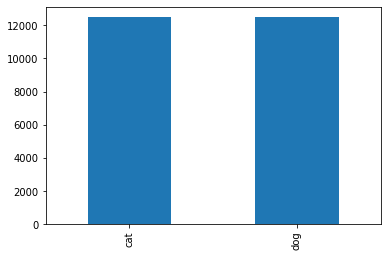

In [18]:
pd.Series(X_Title).value_counts().plot.bar()

####Callbacks

In [19]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [20]:
EarlyStop = EarlyStopping(patience=10)

In [21]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            lr=1e-3,
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [22]:
callbacks = [EarlyStop, learning_rate_reduction]

#### Data Augmentation

In [23]:
data_augmentation_layer = Sequential([                                    
  layers.RandomFlip('horizontal',input_shape=(IMG_SIZE, IMG_SIZE, 3)),
  layers.RandomRotation(0.15),
  layers.RandomZoom(0.2),
  layers.RandomWidth(0.1),
  layers.RandomHeight(0.1),
], name='data_augmentation')

In [24]:
from tensorflow import keras

Convolutional Neural Networks

In [25]:
model = keras.Sequential([
data_augmentation_layer,
    
keras.layers.Conv2D(filters=16,kernel_size = (3, 3),strides=1),
keras.layers.Activation(activation='relu'),
keras.layers.MaxPool2D(),
    
keras.layers.Conv2D(filters=32,kernel_size = (3, 3),strides=1),
keras.layers.Activation(activation='relu'),
keras.layers.MaxPool2D(),    
keras.layers.BatchNormalization(),
    
keras.layers.Conv2D(filters=64,kernel_size = (3, 3),strides=1),
keras.layers.Activation(activation='relu'),
keras.layers.MaxPool2D(),    
    
keras.layers.Conv2D(filters=128,kernel_size =(3, 3), strides=1),
keras.layers.Activation(activation='relu'),
keras.layers.MaxPool2D(),
  
keras.layers.Conv2D(filters=256,kernel_size =(3, 3), strides=1),
keras.layers.Activation(activation='relu'),
   
keras.layers.GlobalMaxPool2D(),   

keras.layers.Dense(256,activation='relu') ,

keras.layers.BatchNormalization(),
keras.layers.Dense(128,activation='relu') ,
    

keras.layers.Dense(64,activation='relu') ,
    
keras.layers.Dense(32,activation='relu') ,
keras.layers.Dense(16,activation='relu') ,
keras.layers.Dense(units=2,activation='softmax') ])
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 conv2d (Conv2D)             (None, None, None, 16)    448       
                                                                 
 activation (Activation)     (None, None, None, 16)    0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, None, None, 16)   0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 32)    4640      
                                                                 
 activation_1 (Activation)   (None, None, None, 32)    0

Train the model

In [26]:
EPOCHES = 10
BATCHES = 32

history = model.fit(X_Train, Y_Train, epochs=EPOCHES,batch_size=BATCHES,verbose=1,callbacks=callbacks, validation_data=(X_val, y_val))

Epoch 1/10
688/688 [==============================] - ETA: 0s - loss: 0.6481 - accuracy: 0.6198

688/688 [==============================] - 903s 1s/step - loss: 0.6481 - accuracy: 0.6198 - val_loss: 0.6203 - val_accuracy: 0.6443 - lr: 0.0010
Epoch 2/10
688/688 [==============================] - ETA: 0s - loss: 0.5823 - accuracy: 0.7002

688/688 [==============================] - 907s 1s/step - loss: 0.5823 - accuracy: 0.7002 - val_loss: 0.6541 - val_accuracy: 0.6647 - lr: 0.0010
Epoch 3/10
688/688 [==============================] - ETA: 0s - loss: 0.5298 - accuracy: 0.7379

688/688 [==============================] - 904s 1s/step - loss: 0.5298 - accuracy: 0.7379 - val_loss: 0.5771 - val_accuracy: 0.7343 - lr: 0.0010
Epoch 4/10
688/688 [==============================] - ETA: 0s - loss: 0.4853 - accuracy: 0.7723

688/688 [==============================] - 900s 1s/step - loss: 0.4853 - accuracy: 0.7723 - val_loss: 0.8351 - val_accuracy: 0.6320 - lr: 0.0010
Epoch 5/10
688/688 [==============================] - ETA: 0s - loss: 0.4330 - accuracy: 0.7990

688/688 [==============================] - 895s 1s/step - loss: 0.4330 - accuracy: 0.7990 - val_loss: 0.4252 - val_accuracy: 0.8013 - lr: 0.0010
Epoch 6/10
688/688 [==============================] - ETA: 0s - loss: 0.3884 - accuracy: 0.8243

688/688 [==============================] - 915s 1s/step - loss: 0.3884 - accuracy: 0.8243 - val_loss: 1.1727 - val_accuracy: 0.6267 - lr: 0.0010
Epoch 7/10
688/688 [==============================] - ETA: 0s - loss: 0.3580 - accuracy: 0.8420

688/688 [==============================] - 944s 1s/step - loss: 0.3580 - accuracy: 0.8420 - val_loss: 0.3104 - val_accuracy: 0.8610 - lr: 0.0010
Epoch 8/10
688/688 [==============================] - ETA: 0s - loss: 0.3287 - accuracy: 0.8534

688/688 [==============================] - 899s 1s/step - loss: 0.3287 - accuracy: 0.8534 - val_loss: 1.3099 - val_accuracy: 0.6690 - lr: 0.0010
Epoch 9/10
688/688 [==============================] - ETA: 0s - loss: 0.3112 - accuracy: 0.8641

688/688 [==============================] - 883s 1s/step - loss: 0.3112 - accuracy: 0.8641 - val_loss: 0.3720 - val_accuracy: 0.8353 - lr: 0.0010
Epoch 10/10
688/688 [==============================] - ETA: 0s - loss: 0.3022 - accuracy: 0.8690

688/688 [==============================] - 901s 1s/step - loss: 0.3022 - accuracy: 0.8690 - val_loss: 0.4018 - val_accuracy: 0.8507 - lr: 0.0010


Save the model with weights

In [27]:
model_json = model.to_json()
with open('/content/drive/MyDrive/MASTERS DEGREE/Makerere Unversity/SEM 2/ComputerVision/DogvsCats/working/model.json', 'w') as json_file:
    json_file.write(model_json)

In [28]:
model.save_weights('/content/drive/MyDrive/MASTERS DEGREE/Makerere Unversity/SEM 2/ComputerVision/DogvsCats/working/model_weights.h5')

check our model's history

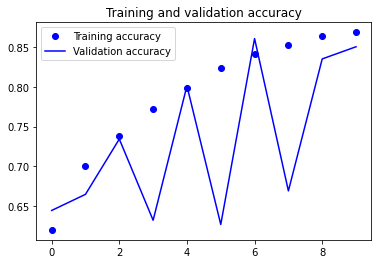

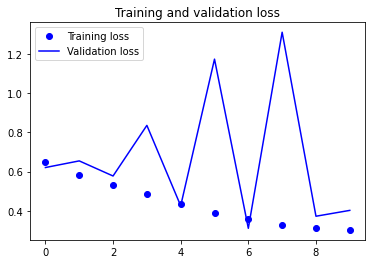

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Predict the test images

In [30]:
predicted_images = model.predict(X_test)

In [31]:
CATEGORIES = ['Cat', 'Dog']

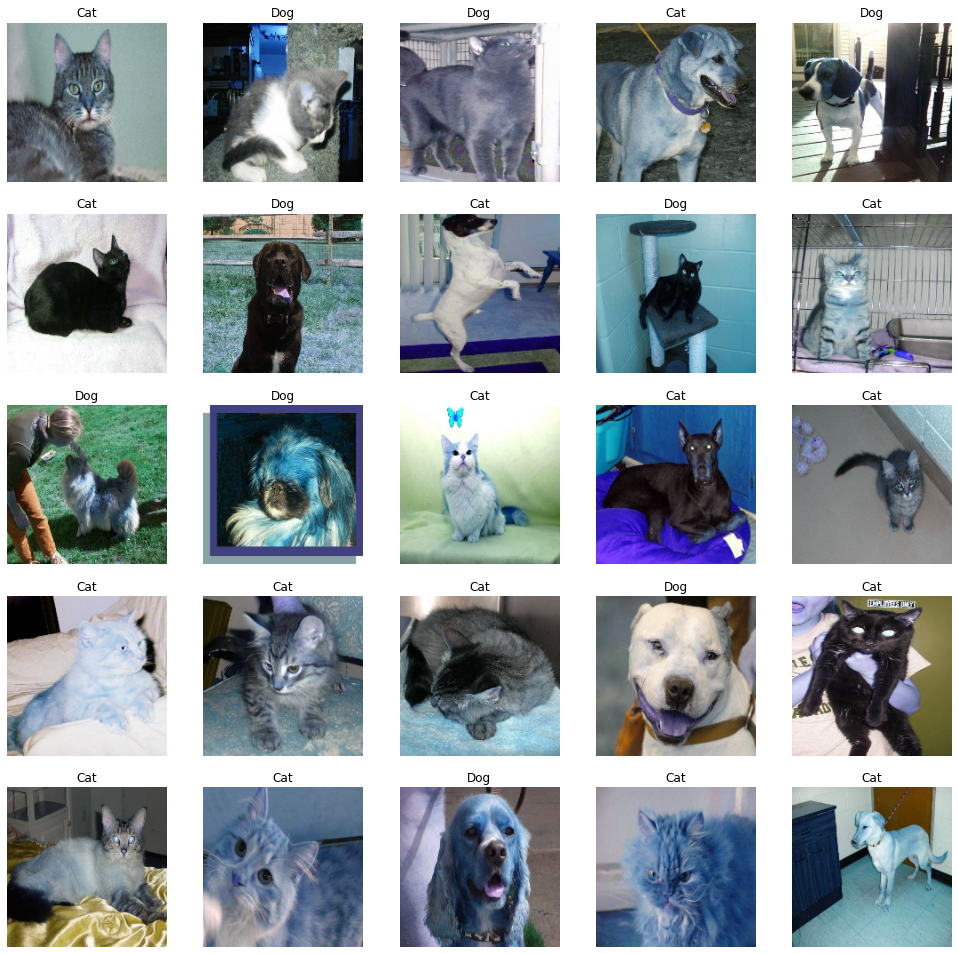

In [32]:
plt.figure(figsize=(17, 17))
for n, i in enumerate(list(np.random.randint(0, len(X_test), 25))):
    plt.subplot(5, 5, n+1)
    plt.imshow(array_to_img(X_test[i]))
    plt.axis('off')
    plt.title(CATEGORIES[np.argmax(predicted_images[i])])